In [1]:
%matplotlib inline
#%matplotlib notebook
import gui
from SFG2D.dashboards import MyWidgets
from watchdog.observers import Observer

# Set plot layout
#plt.style.use('seaborn-notebook')
#sns.set_style("white")
#sns.set_style("ticks")
#sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

ffolder = '/home/malte/MeasurmentData/2016/09/08/'

# Observer to monitor changes in ffolder
ffolder_observer = Observer()
event_handler = gui.MyHandler(ffolder)

# Widget for the PumpProbe Dashboard
ppWidget = gui.PumpProbeWidget(event_handler.fnames)

# link eventhandler and widget, so widget is informed
# by event_handler in case of file changes
event_handler.ppWidget = ppWidget

# Start file observer so monitor
ffolder_observer.schedule(event_handler, ffolder, recursive=False)
ffolder_observer.start()

# Link Traitlets to have the same files in all widgets
ppWidget.linkTraitlets()

# Stup individual widgets
ppWidget.w_ir = MyWidgets.DataImporter(ffolder, ppWidget.ir_fpath, 
                           ppWidget.fbase, ppWidget.ir_ppdelay, 
                           ppWidget.ir_spec, ppWidget.ir_sub_base)
ppWidget.w_pump = MyWidgets.DataImporter(ffolder, ppWidget.pump_fpath, 
                           ppWidget.pump_fbase, ppWidget.pump_ppdelay, 
                           ppWidget.pump_spec, ppWidget.pump_sub_base)
ppWidget.w_pump_probe = MyWidgets.PumpProbeDataImporter(
    ffolder, ppWidget.ts0_fpath, 
    ppWidget.fbase, ppWidget.ts0_ppdelay, 
    ppWidget.ts0_pumped, ppWidget.ts0_probed, ppWidget.pump_sub_base,
    ppWidget.ts0_normalize, norm_scan = ppWidget.w_ir.data
)
ppWidget.load(ffolder)

/media/sf_deiseroth/Analysis/SFG2D/dashboards/pump-probe/gui.py:143: UserWarning: No ppWidget.json file in /home/malte/MeasurmentData/2016/09/08/
  warnings.warn('No ppWidget.json file in %s' % ffolder)


## IR Profile

In [2]:
ppWidget.w_ir(title='IR Profile', x_label=r'Wavenumbers in 1/cm', y_label='Counts')

/home/malte/Analysis/SFG2D/io/veronica.py:251: UserWarning: cant determine spectrum type of data by filename.Trying to determine datatype from content.This is much slower
  warnings.warn('cant determine spectrum type of data by filename.'


TraitError: The "_panzoom" trait is read-only.

In [28]:
from IPython.display import display
from bqplot import LinearScale, Axis, Lines, Figure, Toolbar, PanZoom, DateScale
import bqplot.pyplot as plt
from ipywidgets import interaction, interact
import numpy as np

np.random.seed(0)
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))

xs_pz = LinearScale()
ys_pz = LinearScale()
line_pz = Lines(x=x, y=y, scales={'x': xs_pz, 'y': ys_pz})

panzoom = PanZoom(scales={'y': [ys_pz]})
xax = Axis(scale=xs_pz, label='Date', grids='off')
yax = Axis(scale=ys_pz, label='Price', orientation='vertical', grids='off')

fig = Figure(marks=[line_pz], axes=[xax, yax], interaction=panzoom)




#tb = Toolbar(figure=fig)
#pz = PanZoom(scales={'x': [fig.scale_x]})
#fig.pyplot = tb
#fig.interaction = pz

#tb.widgets
#
#PanZoom(scales={'x': [my_x_scale]})
display(fig)

In [24]:
x_data[0]

0

In [11]:
aa = fig.axes[0]


IndexError: list index out of range

In [11]:
tb._panzoom

In [5]:
import warnings
warnings.warn("test %s" % 1)

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: test 1
  from ipykernel import kernelapp as app


/home/malte/Analysis/SFG2D/io/veronica.py:251: UserWarning: cant determine spectrum type of data by filename.Trying to determine datatype from content.This is much slower
  warnings.warn('cant determine spectrum type of data by filename.'


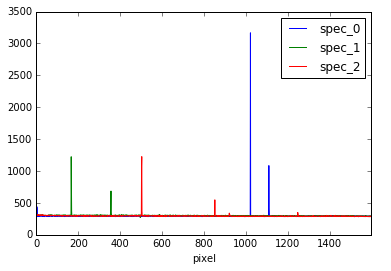

In [6]:
import SFG2D
import pandas as pd
import matplotlib.pyplot as plt

ret = SFG2D.io.veronica.read_auto("/home/malte/MeasurmentData/2016/09/08/10min_4.6-640nm.dat")

ret.df.plot()
plt.show()

In [ ]:
ppdData.ir = '/19_sp_d20_w675_gcm_e20m_ssp_pu1_pr0_vis1_gal1_chop1_purge1.dat'
ppdData.ir.df["spec_0"].clip_upper(340).plot.hist(bins=np.arange(260, 300, 2))
ppdData.ir.df["spec_1"].clip_upper(340).plot.hist(bins=np.arange(260, 300, 2), alpha=0.5)

## Pump Profile

In [5]:
ppWidget.w_pump(title='Pump-Vis SFG', x_label=r'Wavenumbers in 1/cm', y_label='Counts')

/home/malte/Analysis/SFG2D/io/veronica.py:261: UserWarning: cant determine spectrum type of data by filename.Trying to determine datatype from content.This is much slower
  warnings.warn('cant determine spectrum type of data by filename.'


In [4]:
ppWidget.save(ppdData.ffolder)

# Pump-Probe Data

In [7]:
ppWidget.w_pump_probe = MyWidgets.PumpProbeDataImporter(
    ffolder, ppWidget.ts0_fpath, 
    ppWidget.fbase, ppWidget.ts0_ppdelay, 
    ppWidget.ts0_pumped, ppWidget.ts0_probed, ppWidget.pump_sub_base,
    ppWidget.ts0_normalize, norm_scan = ppWidget.w_ir.data
)
ppWidget.w_pump_probe(title='Pump Probe Data', x_label='Wavenumbers in 1/cm', y_label='Counts')

/home/malte/Analysis/SFG2D/io/veronica.py:261: UserWarning: cant determine spectrum type of data by filename.Trying to determine datatype from content.This is much slower
  warnings.warn('cant determine spectrum type of data by filename.'


## Normalize Spectra

In [ ]:
%%capture
fig_norm, ax_norm = plt.subplots(1,2, figsize=(12,6))
ax_norm[0].set_title("Unnormalized")
ax_norm[1].set_title("Normalized")
#ax_norm[1].set_ylim(-0.002, 0.015)
ppdData.ts0u.pumped.ix[ppWidget.ts0_ppdelay.value].plot(ax = ax_norm[0], label="pumped")
ppdData.ts0u.probed.ix[ppWidget.ts0_ppdelay.value].plot(ax = ax_norm[0], label="probed")

ppdData.ts0.pumped.ix[ppWidget.ts0_ppdelay.value].plot(ax = ax_norm[1], label = "pumped")
ppdData.ts0.probed.ix[ppWidget.ts0_ppdelay.value].plot(ax = ax_norm[1], label = "probed")

ax_norm[0].legend()
fig_norm.tight_layout()


def plot_norm_update(pp_delay):
    ax_norm[0].lines[0].set_ydata(ppdData.ts0u.pumped.ix[pp_delay])
    ax_norm[0].lines[1].set_ydata(ppdData.ts0u.probed.ix[pp_delay])

    ax_norm[1].lines[0].set_ydata(ppdData.ts0.pumped.ix[pp_delay])
    ax_norm[1].lines[1].set_ydata(ppdData.ts0.probed.ix[pp_delay])
       
    display(fig_norm)

In [ ]:
ipyw.interact(plot_norm_update, pp_delay=ppWidget.ts0_ppdelay_childs[0])

# Spectra Over Time

In [ ]:
%%capture
roi = slice(2200,2800)

def plot_compare_update(pp_delay):
    for i in range(ppdData.ts0.df['spec_0'].shape[1]):
        data = ppdData.ts0.df.loc[ppWidget.ts0_ppdelay_childs[1].value, "spec_0"][roi].iloc[:,i]
        ax_compare[0].lines[i].set_ydata(data)
        data = ppdData.ts0.df.loc[ppWidget.ts0_ppdelay_childs[1].value, "spec_1"][roi].iloc[:,i]
        ax_compare[1].lines[i].set_ydata(data)
    
    display(fig_compare)
    

fig_compare, ax_compare = plt.subplots(1, 2, sharey=True, figsize=(16,6))
ppdData.ts0.df.loc[ppWidget.ts0_ppdelay_childs[1].value, "spec_0"][roi].plot(ax=ax_compare[0])        
ppdData.ts0.df.loc[ppWidget.ts0_ppdelay_childs[1].value, "spec_1"][roi].plot(ax=ax_compare[1])
for ax, title in zip(ax_compare, ('spec_0', 'spec_1')):
    ax.set_title(title)
    for i in range(len(ax.lines)):
        ax.lines[i].set_label('run %i'%i)
    ax.legend()
#plt.ylim(-0.002, 0.017)

In [ ]:
w_f0 = ipyw.interact(plot_compare_update, pp_delay=ppWidget.ts0_ppdelay_childs[1])
#display(w_f0)

## Smoothed

In [ ]:
#pp_slider3 = ipyw.SelectionSlider(options=list(ppdData.ts0.pp_delays), value=0, continuous_update=False)
roi = slice(2200,2800) # get this from the pump
def p3(pp_delay):
    ppdData.ts0.pumped.loc[pp_delay][roi].rolling(10).mean().plot(label="pumped")
    ppdData.ts0.probed.loc[pp_delay][roi].rolling(10).mean().plot(label="probed")
    #plt.ylim(0.001, 0.015)
    plt.title(str(pp_delay) + " fs")
    plt.legend()
    #plt.grid()

ppWidget.p3 = ipyw.interactive(p3, pp_delay=ppWidget.ts0_ppdelay_childs[2])
display(ppWidget.p3)
plt.show()

# Bleach Trace

In [ ]:
roi_slider_range = int(ppdData.ts0.df.index.levels[1].min()), int(ppdData.ts0.df.index.levels[1].max())
#roi_slider_range = 0, 800
roi_slider = ipyw.IntRangeSlider(
    value = (2450, 2600),
    min = roi_slider_range[0],
    max = roi_slider_range[1],
    continuous_update=False
)

#roi = slice(2450,2600)

def plot_bleach_trace(roi):
    tss = ppdData.ts0.bleach.unstack(0)
    tss = tss[(tss.index > roi[0]) & (tss.index < roi[1])].sum()

    tss.plot()
    plt.scatter(tss.index, tss)
    plt.title(r"Bleach from (%i to %i)cm$^{-1}$"%(roi[0], roi[1]))
    
ipyw.interact(plot_bleach_trace, roi=roi_slider)
plt.show()

In [ ]:
ppdData.ts0.pump

In [ ]:
ppdData.ts0.df.ix[0, "spec_0"].plot()

In [ ]:
import datetime
pp_delays = 25
exp_time = 10# in minutes
reps = 3 #number of repetitions
datetime.datetime.now() + datetime.timedelta(minutes=pp_delays*exp_time*reps)

In [ ]:
25*10/60